In [1]:
conda install praw -y

Retrieving notices: ...working... done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - praw

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [2]:
import praw

In [3]:
import pandas as pd

In [4]:
pip install credentials

Note: you may need to restart the kernel to use updated packages.


In [5]:
import credentials


In [41]:
reddit = praw.Reddit(client_id = 'HnhrLIavPhN7zR1ZKgna-w',
                     client_secret = 'FgTx4QJFhM73tHaIB7zEcp67WOBaJQ',
                     user_agent='Scrape')

In [42]:
subreddit = reddit.subreddit('colorado').hot(limit=15)

In [43]:
for post in subreddit: 
        print(post.title,post.score)

Just a mountain lion chilling in a tree off of a bike trail. 550
Sangre De Cristo Mountains 122
RMNP 103
Paint Mines, Calhan Colorado 40
Small section of the Gore Range 105
More cool clouds in Longmont 25
San de Cristos… 577
2-17-23 Never not cool driving under this. (Particularly beautiful today) 347
Weird clouds in Longmont 447
Garden of the Gods. 02/16/23 650
Highway 14 near Cameron pass. 136
"Frozen Reverberations of a Timeless Place" 7
Fresh Snowfall in Lafayette 2
Colorado legislation to ban horse slaughter for human consumption stripped down after opposition from ranchers 337
Snowmobiling in Winter Park Today 77


In [44]:
list(subreddit)

[]

In [45]:
post.score

77

In [46]:
post.title

'Snowmobiling in Winter Park Today'

In [59]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


colo_subreddit = reddit.subreddit('colorado').hot(limit=None)

for post in list(colo_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [60]:
colo_df = pd.DataFrame(reddit_data)

In [61]:
colo_df

,title,link,author,n_comments,score,text
0,Just a mountain lion chilling in a tree off of...,/r/Colorado/comments/115kecx/just_a_mountain_l...,Slims,39,555,
1,Sangre De Cristo Mountains,/r/Colorado/comments/115o44f/sangre_de_cristo_...,Sichtopher_Chrisko,7,121,
2,RMNP,/r/Colorado/comments/115k5kz/rmnp/,evilverdandi,5,106,
3,"Paint Mines, Calhan Colorado",/r/Colorado/comments/115o0n3/paint_mines_calha...,Tony_Barker,1,42,
4,Small section of the Gore Range,/r/Colorado/comments/115eufy/small_section_of_...,acidicbreeze,1,104,
...,...,...,...,...,...,...
957,Winter is right around the corner...,/r/Colorado/comments/ysit4l/winter_is_right_ar...,SexiestDexiest,16,305,
958,Colorado Homebuyers Finally Have a Shot in Cit...,/r/Colorado/comments/ysecvc/colorado_homebuyer...,rdavis414,131,366,
959,Sunset last year in the Springs,/r/Colorado/comments/ysg7hk/sunset_last_year_i...,woodsgb,7,251,
960,Wellington Co. Veterans Day flyover,/r/Colorado/comments/yspqdb/wellington_co_vete...,oneeyedobserver,2,72,


In [62]:
import sqlite3

In [63]:
con = sqlite3.connect("Colo_data.subreddit.sqlite")#opening connection to data base
colo_df.to_sql('posts',con, if_exists='replace',index = False)# reading all rows

962

In [64]:
colo_data_check = pd.read_sql_query('SELECT * FROM posts', con)
colo_data_check

,title,link,author,n_comments,score,text
0,Just a mountain lion chilling in a tree off of...,/r/Colorado/comments/115kecx/just_a_mountain_l...,Slims,39,555,
1,Sangre De Cristo Mountains,/r/Colorado/comments/115o44f/sangre_de_cristo_...,Sichtopher_Chrisko,7,121,
2,RMNP,/r/Colorado/comments/115k5kz/rmnp/,evilverdandi,5,106,
3,"Paint Mines, Calhan Colorado",/r/Colorado/comments/115o0n3/paint_mines_calha...,Tony_Barker,1,42,
4,Small section of the Gore Range,/r/Colorado/comments/115eufy/small_section_of_...,acidicbreeze,1,104,
...,...,...,...,...,...,...
957,Winter is right around the corner...,/r/Colorado/comments/ysit4l/winter_is_right_ar...,SexiestDexiest,16,305,
958,Colorado Homebuyers Finally Have a Shot in Cit...,/r/Colorado/comments/ysecvc/colorado_homebuyer...,rdavis414,131,366,
959,Sunset last year in the Springs,/r/Colorado/comments/ysg7hk/sunset_last_year_i...,woodsgb,7,251,
960,Wellington Co. Veterans Day flyover,/r/Colorado/comments/yspqdb/wellington_co_vete...,oneeyedobserver,2,72,


In [65]:
author_data = pd.read_sql_query('SELECT author from posts',con)
author_data

,author
0,Slims
1,Sichtopher_Chrisko
2,evilverdandi
3,Tony_Barker
4,acidicbreeze
...,...
957,SexiestDexiest
958,rdavis414
959,woodsgb
960,oneeyedobserver


In [66]:
auth_mod = pd.read_sql_query('SELECT * from posts WHERE author = "AutoModerator"',con)
auth_mod

,title,link,author,n_comments,score,text


In [67]:
high_score = pd.read_sql_query('SELECT * from posts WHERE score > 1000',con)
high_score

,title,link,author,n_comments,score,text
0,So good to see the mountains covered in snow.,/r/Colorado/comments/113tiys/so_good_to_see_th...,evilverdandi,75,1152,
1,Adam Frisch will run again to unseat Lauren Bo...,/r/Colorado/comments/1127oqo/adam_frisch_will_...,danikawo,184,1815,
2,Oil Painting I did of the view up Homestake Re...,/r/Colorado/comments/10wxn5a/oil_painting_i_di...,AdamCheskeyArt,31,1105,
3,Roxborough SP is an underrated gem,/r/Colorado/comments/10vf3cy/roxborough_sp_is_...,seanjodon,47,1028,
4,'I stood naked with my shotgun.' Black rancher...,/r/Colorado/comments/10utltj/i_stood_naked_wit...,blucifer_jr,192,1086,
5,The same amount of 'therms' in January '22 cos...,/r/Colorado/comments/10tkgyq/the_same_amount_o...,brodie7838,285,1080,
6,This is flat farmland in Eastern Colorado with...,/r/Colorado/comments/10sjjaa/this_is_flat_farm...,overList830,95,5076,
7,Saw a few moose outside the condo I rented in ...,/r/Colorado/comments/10rlc48/saw_a_few_moose_o...,superstoned26,68,1622,
8,Another Colorado hospital stops letting women ...,/r/Colorado/comments/10py5it/another_colorado_...,dontfollowthesheeple,251,1155,
9,"Who cares how cold it is, go for that hike any...",/r/Colorado/comments/10oejcv/who_cares_how_col...,P4TY,62,1034,


In [68]:
high_score.iloc[1,:]

title         Adam Frisch will run again to unseat Lauren Bo...
link          /r/Colorado/comments/1127oqo/adam_frisch_will_...
author                                                 danikawo
n_comments                                                  184
score                                                      1815
text                                                           
Name: 1, dtype: object

In [74]:
import nltk

In [78]:
#let's remove stopwords in the high_score with title including SCHD and JEPI. 
#first download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/brim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
#prints the common stopwords which do not aid in analysis
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [83]:
high_score['title']= high_score['title'] + high_score['text']

In [84]:
high_score

,title,link,author,n_comments,score,text
0,So good to see the mountains covered in snow.,/r/Colorado/comments/113tiys/so_good_to_see_th...,evilverdandi,75,1152,
1,Adam Frisch will run again to unseat Lauren Bo...,/r/Colorado/comments/1127oqo/adam_frisch_will_...,danikawo,184,1815,
2,Oil Painting I did of the view up Homestake Re...,/r/Colorado/comments/10wxn5a/oil_painting_i_di...,AdamCheskeyArt,31,1105,
3,Roxborough SP is an underrated gem,/r/Colorado/comments/10vf3cy/roxborough_sp_is_...,seanjodon,47,1028,
4,'I stood naked with my shotgun.' Black rancher...,/r/Colorado/comments/10utltj/i_stood_naked_wit...,blucifer_jr,192,1086,
5,The same amount of 'therms' in January '22 cos...,/r/Colorado/comments/10tkgyq/the_same_amount_o...,brodie7838,285,1080,
6,This is flat farmland in Eastern Colorado with...,/r/Colorado/comments/10sjjaa/this_is_flat_farm...,overList830,95,5076,
7,Saw a few moose outside the condo I rented in ...,/r/Colorado/comments/10rlc48/saw_a_few_moose_o...,superstoned26,68,1622,
8,Another Colorado hospital stops letting women ...,/r/Colorado/comments/10py5it/another_colorado_...,dontfollowthesheeple,251,1155,
9,"Who cares how cold it is, go for that hike any...",/r/Colorado/comments/10oejcv/who_cares_how_col...,P4TY,62,1034,


In [85]:
words = ' '.join(high_score['title']).lower().split()
clean_words = [w for w in words if w not in set(stops)]

In [86]:
cleaned_fd = nltk.FreqDist(clean_words)
cleaned_fd.most_common(20)
#Colorado is the most used word and castle is the second. 

[('colorado', 14),
 ('castle', 6),
 ('took', 4),
 ('-', 4),
 ('oil', 3),
 ('painting', 3),
 ('view', 3),
 ('sunrise', 3),
 ('last', 3),
 ('denver', 3),
 ('great', 3),
 ('creek', 3),
 ('morning', 3),
 ('springs', 3),
 ('good', 2),
 ('see', 2),
 ('mountains', 2),
 ('lauren', 2),
 ('boebert', 2),
 ('driving', 2)]

<AxesSubplot:ylabel='Frequency'>

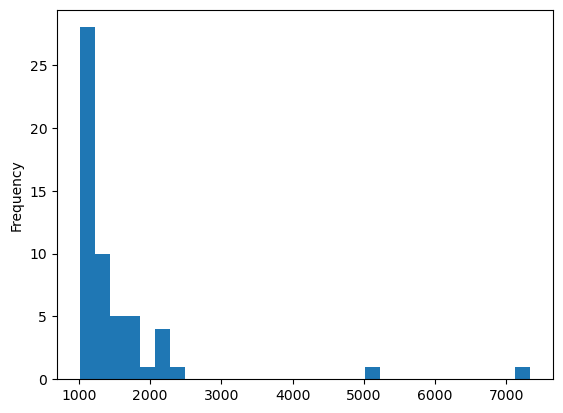

In [87]:
high_score['score'].plot.hist(bins=30)
#this makes sense for the distribution to be skewed becuase the data frame contains all rows where the score
#is greater than 1,000.


In [88]:
#It appears we have a few outliers. I would like to see what those are. 
high_score[high_score['score'] > 5000]

,title,link,author,n_comments,score,text
6,This is flat farmland in Eastern Colorado with...,/r/Colorado/comments/10sjjaa/this_is_flat_farm...,overList830,95,5076,
48,"5 people are killed, at least 18 injured in a ...",/r/Colorado/comments/z00xxn/5_people_are_kille...,cityb0t,965,7337,


<AxesSubplot:xlabel='score', ylabel='n_comments'>

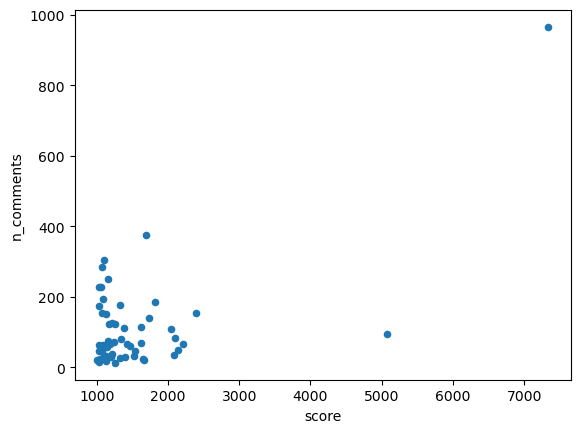

In [89]:
high_score.plot.scatter(x='score', y='n_comments')
#There does not seem to be much of a correlation, but it is more of a positive correlation than negative. 

<AxesSubplot:>

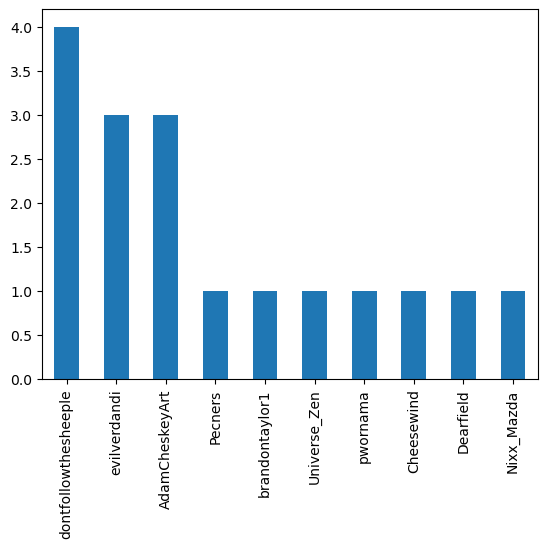

In [101]:
high_score['author'].value_counts()[:10].plot.bar()

In [112]:
high_score.to_sql('theposts',con, if_exists='replace',index = False)# reading all rows


56

In [113]:
user_with_highest_counts = pd.read_sql_query('SELECT * FROM theposts WHERE author = "dontfollowthesheeple"', con)
user_with_highest_counts


,title,link,author,n_comments,score,text
0,Another Colorado hospital stops letting women ...,/r/Colorado/comments/10py5it/another_colorado_...,dontfollowthesheeple,251,1155,
1,2 handguns stolen outside Colorado Capitol fro...,/r/Colorado/comments/106jp8j/2_handguns_stolen...,dontfollowthesheeple,228,1033,
2,"As customers report huge jumps in bills, Excel...",/r/Colorado/comments/102bmtb/as_customers_repo...,dontfollowthesheeple,227,1066,
3,Let's call it what it is - corporate profits -...,/r/Colorado/comments/z6x9x8/lets_call_it_what_...,dontfollowthesheeple,155,1078,


In [117]:
#import a library title TextBlob to use to figure out the polarity (positive or negative sentiment) and
#subjectivity.
from textblob import TextBlob

tb = TextBlob("2 handguns stolen outside Colorado Capitol fro...")
tb.sentiment
#the polarity is 0, which is not accurate. Anything "stolen" should have a negative sentiment. 

Sentiment(polarity=0.0, subjectivity=0.05)

In [121]:
#I will use the above and apply it to the entire dataframe
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]
high_score['title_sentiment'] = high_score['title'].apply(get_tb_sentiment)


<AxesSubplot:ylabel='Frequency'>

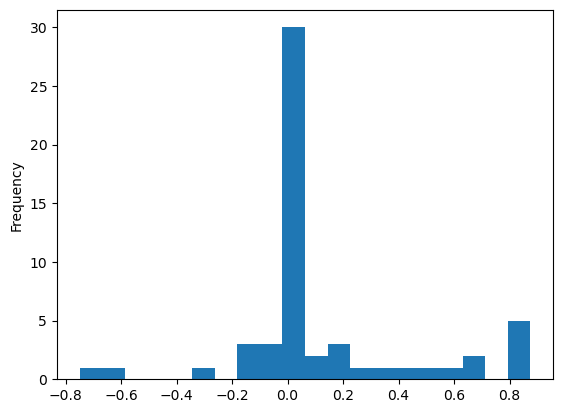

In [122]:
high_score['title_sentiment'].plot.hist(bins=20)
#It seems the sentiment has been 0, so not positive or negative. 

In [123]:
high_score['title_sentiment'].describe()

count    56.000000
mean      0.111246
std       0.326163
min      -0.750000
25%       0.000000
50%       0.000000
75%       0.159801
max       0.875000
Name: title_sentiment, dtype: float64

In [124]:
#sort the dataframe by the polarity values 
high_score.sort_values(by='title_sentiment')[['title', 'title_sentiment']]

,title,title_sentiment
9,"Who cares how cold it is, go for that hike any...",-0.750000
31,Arctic Cold Front Just Slammed Through Denver ...,-0.600000
6,This is flat farmland in Eastern Colorado with...,-0.312500
46,Meet the Man Who Took Down the Club Q Gunman,-0.155556
27,"Psilocybin, other psychedelics, officially dec...",-0.125000
7,Saw a few moose outside the condo I rented in ...,-0.100000
4,'I stood naked with my shotgun.' Black rancher...,-0.055556
53,"November 11th, 1979, Robin Williams joined the...",-0.042424
48,"5 people are killed, at least 18 injured in a ...",-0.027778
32,Colorado Topographical Flag,0.000000


In [126]:
#Prints the most negative title. Cold could considered negative, but that is subjective. 
high_score.sort_values(by='title_sentiment')['title'].to_list()[:1]

['Who cares how cold it is, go for that hike anyways!']

In [130]:
#Prints the most positive title.This looks correct because the word 'beautiful' it will influence polarity.
high_score.sort_values(by='title_sentiment', ascending=False)['title'].to_list()[:2]

['Good morning Colorado! Anyone know what this phenomenon is called?',
 'Beautiful drive today.']